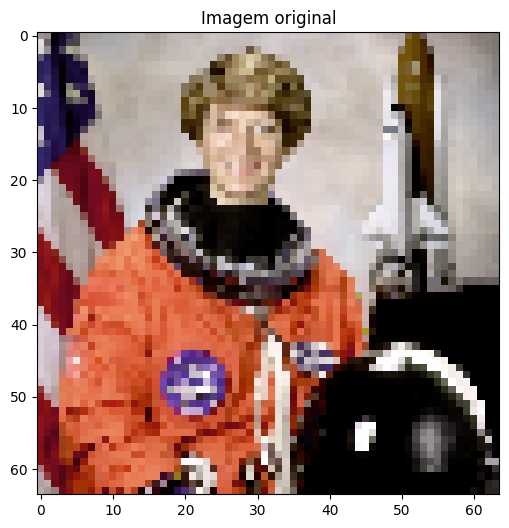

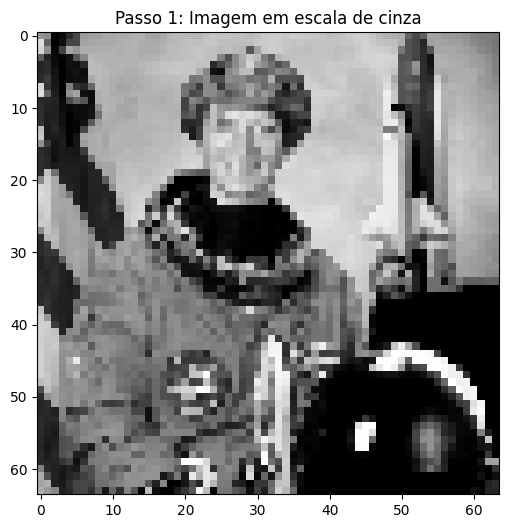

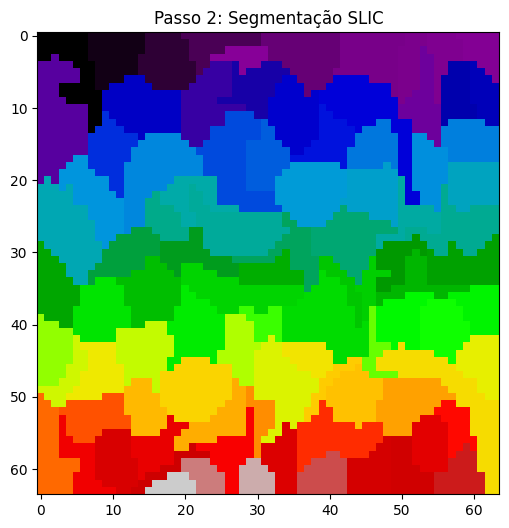

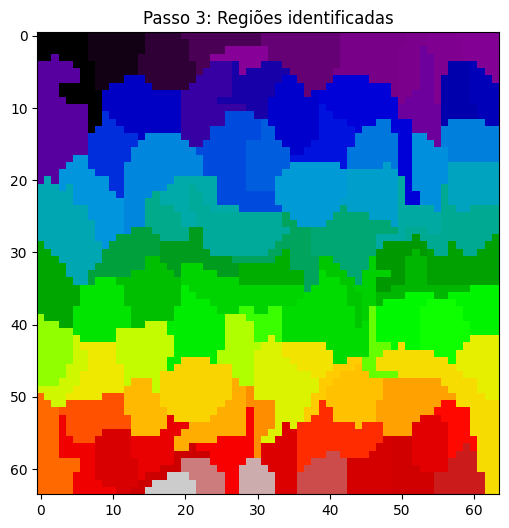

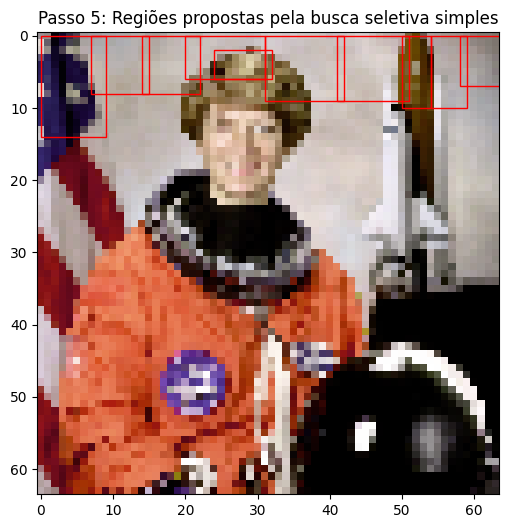

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.measure import label, regionprops
from skimage.segmentation import slic
from skimage import data

# Função simplificada para simular o Selective Search
def simple_selective_search(image):
    # Passo 1: Converter a imagem para escala de cinza
    gray_image = rgb2gray(image)
    plt.figure(figsize=(6, 6))
    plt.imshow(gray_image, cmap='gray')
    plt.title("Passo 1: Imagem em escala de cinza")
    plt.show()
    
    # Passo 2: Segmentar a imagem usando SLIC
    segments = slic(image, n_segments=100, compactness=10, sigma=1, start_label=1)
    plt.figure(figsize=(6, 6))
    plt.imshow(segments, cmap='nipy_spectral')
    plt.title("Passo 2: Segmentação SLIC")
    plt.show()
    
    # Passo 3: Identificar as regiões na imagem segmentada
    labeled_regions = label(segments)
    plt.figure(figsize=(6, 6))
    plt.imshow(labeled_regions, cmap='nipy_spectral')
    plt.title("Passo 3: Regiões identificadas")
    plt.show()
    
    # Passo 4: Criar as caixas delimitadoras
    props = regionprops(labeled_regions)
    bboxes = []
    for prop in props:
        minr, minc, maxr, maxc = prop.bbox
        bboxes.append((minc, minr, maxc - minc, maxr - minr))
    
    return bboxes

# Gerar uma imagem de exemplo
image = data.astronaut()  # Imagem de exemplo do skimage
image = image[::8, ::8]  # Reduzir o tamanho da imagem para simplificar

# Exibir a imagem original
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title("Imagem original")
plt.show()

# Aplicar a função de busca seletiva simples
bboxes = simple_selective_search(image)

# Passo 5: Exibir a imagem com as caixas delimitadoras
plt.figure(figsize=(6, 6))
plt.imshow(image)
for (x, y, w, h) in bboxes[:10]:  # Vamos exibir as 10 primeiras regiões propostas
    plt.gca().add_patch(plt.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=1))

plt.title("Passo 5: Regiões propostas pela busca seletiva simples")
plt.show()
